# Play Store Apps Analysis

### Description of App Dataset columns
##### App : The name of the app
##### Category : The category of the app
##### Rating : The rating of the app in the Play Store
##### Reviews : The number of reviews of the app
##### Size : The size of the app
##### Install : The number of installs of the app
##### Type : The type of the app (Free/Paid)
##### Price : The price of the app (0 if it is Free)
##### Content Rating :The appropiate target audience of the app
##### Genres: The genre of the app
##### Last Updated : The date when the app was last updated
##### Current Ver : The current version of the app
##### Android Ver : The minimum Android version required to run the app

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read dataset

In [2]:
df = pd.read_csv(r"C:\Users\avani\Downloads\archive (13)\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## # Data Preprocesing

In [5]:
# Check Null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [7]:
# create a boolean mask for missing values in the "Current Ver" column
mask = df['Current Ver'].isnull()

# select rows with missing values in the "Current Ver" column and drop them
df.drop(df[mask].index, inplace=True)

In [8]:
mask1= df['Android Ver'].isnull()
df.drop(df[mask1].index, inplace=True)

In [9]:
mask2 = df['Type'].isnull()
df.drop(df[mask2].index, inplace=True)

In [10]:
# Check Null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
df.shape

(10829, 13)

### 2) Check Data Types

In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
x=df.duplicated().sum()                            # check duplicates

## Feature Engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [15]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [17]:
df['Genres'].nunique()

119

In [18]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [19]:
df["Rating"].value_counts()

4.193338    1469
4.400000    1108
4.300000    1076
4.500000    1037
4.200000     951
4.600000     823
4.100000     707
4.000000     567
4.700000     499
3.900000     386
3.800000     303
5.000000     274
3.700000     239
4.800000     234
3.600000     174
3.500000     163
3.400000     128
3.300000     102
4.900000      87
3.000000      83
3.100000      69
3.200000      63
2.900000      45
2.800000      42
2.700000      25
2.600000      25
2.500000      21
2.300000      20
2.400000      19
1.000000      16
2.200000      14
1.900000      13
2.000000      12
1.700000       8
1.800000       8
2.100000       8
1.600000       4
1.400000       3
1.500000       3
1.200000       1
Name: Rating, dtype: int64

In [20]:
df["Price"].value_counts()

0         10032
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [21]:
df["Installs"].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [22]:
#  Extract all categorical columns and numerical columns
# cat_cols = categorical columns
# num_cols = numerical columns
# select_dtypes = it returns a dataframe
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
print(cat_cols)
print(num_cols)

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['Rating'], dtype='object')


**Notes:**
From our buissness point of view these columns must be numeric:
  1. Ratting  
  2. Reviews  
  3. Size  
  4. Price  

### Data Cleaning
**Fix numerical columns**

**Fix Reviews**

In [23]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

**Note:** From just looking we see that all data is numeric.

In [24]:
# df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**Note:** Review is done.

**Fix Size**

In [26]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Note:**
If we saw the size column data we will found at most data varies from:
1. MegaByte
2. KiloByte
3. 1000+
4. Varies from device

So we will create new columns each size is in mega, if kilo byte we will change it to mega, 1000+ we will make it 1 mega, and 
varies from device will set it to Nan

In [27]:
# procedure for converting the column "Size" to float
# there are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"
df['Size'] = df['Size'].astype(str).str.replace("M", "")
df['Size'] = df['Size'].replace("Varies with device", np.nan)
df['Size'] = df['Size'].astype(str).str.replace("k", "")
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size'] = df['Size'].apply(lambda x: x/1000 if x>1000 else x)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


**Note:** Size is done

**Fix Price**

In [29]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**Note:**
If we saw the price column data we will found at most data varies from:
1. 0
2. Price with dollar sign
3. Every one

So we will create new columns each price is in dollar, if 0 or every one we will set it to 0, else we remove dollar sign

In [30]:
# Clean the 'Price' column by removing the dollar sign
df['Price'] = df['Price'].str.replace('$', '')

# Convert '0' and 'Every one' to 0, and other values to float
df['Price'] = df['Price'].apply(lambda x: 0 if str(x).lower() in ['0', 'every one'] else (0 if x == 'Everyone' else float(x)))

# Check the 'Price' column
print(df['Price'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10829, dtype: float64


In [31]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


**Note:** Price is done

We now done fix numerical columns

In [33]:
# Checking duplicated values in the columns of the dataset
df.duplicated().sum()

483

In [34]:
# Dropping Duplicate values from the Dataset
df.drop_duplicates(inplace=True)
df.shape

(10346, 13)

### Apply univarant analysis (Numerical Columns)

In [35]:
df.describe()

,Rating,Size,Price
count,10346.000000,8821.000000,10346.000000
mean,4.188718,37.072545,1.031561
std,0.484165,99.503135,16.287252
min,1.000000,1.000000,0.000000
25%,4.100000,5.500000,0.000000
50%,4.200000,14.000000,0.000000
75%,4.500000,33.000000,0.000000
max,5.000000,994.000000,400.000000


In [36]:
df['Category'] = df['Category'].apply(lambda cat : cat.title())

In [37]:
df['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)

In [38]:
df['Category'].value_counts()

Family                 1939
Game                   1121
Tools                   841
Business                427
Medical                 408
Productivity            407
Personalization         386
Lifestyle               373
Communication           366
Finance                 360
Sports                  351
Photography             322
Health_And_Fitness      306
Social                  280
News_And_Magazines      264
Travel_And_Local        237
Books_And_Reference     229
Shopping                224
Dating                  196
Video_Players           175
Maps_And_Navigation     137
Education               130
Food_And_Drink          124
Entertainment           111
Auto_And_Vehicles        85
Libraries_And_Demo       84
Weather                  82
House_And_Home           80
Events                   64
Art_And_Design           64
Parenting                60
Comics                   60
Beauty                   53
Name: Category, dtype: int64

In [39]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [40]:
df['Installs'].value_counts()

1,000,000+        1487
10,000,000+       1132
100,000+          1129
10,000+           1031
1,000+             888
100+               709
5,000,000+         683
500,000+           516
50,000+            473
5,000+             468
10+                384
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Name: Installs, dtype: int64

In [41]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [42]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [43]:
df['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [44]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [45]:
df['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
2.3 and up             642
5.0 and up             546
4.2 and up             386
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [46]:
# del df['Genres']
# del df['Last Updated']
# del df['Current Ver']
# df

**Check outliers**

In [47]:
def check_outlier(df, col):
    if df[col].dtype != 'float64' and df[col].dtype != 'int64':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    plt.figure()
    sns.boxplot(x = col, data=df)
    sns.stripplot(x = col, data=df, color='#0000')

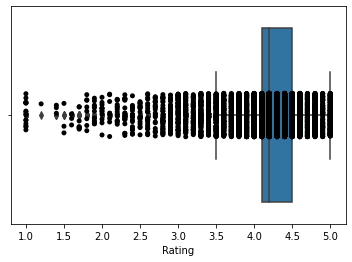

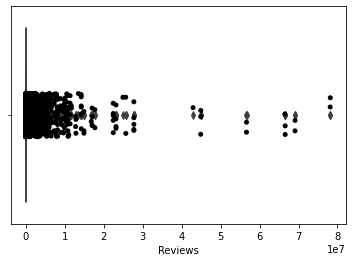

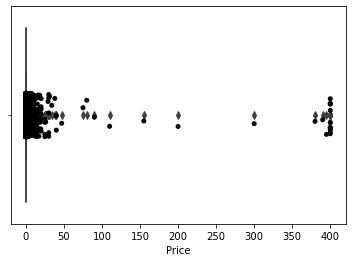

In [48]:
for col in ['Rating', 'Reviews', 'Price']:
    check_outlier(df, col)

**Note:** 
* These outliers mostly not errors cuz this is busness values, so we will not remove it.
* In other somecases u can take outliers rows in another dataset then analysis it, and then analyze clean data alone.

**The most expensive app in the store.**

In [49]:
expensive_app = df[df['Price'] == df['Price'].max()].loc[:, 'App']
print(expensive_app)


4367    I'm Rich - Trump Edition
Name: App, dtype: object


**A Genre has more apps.**

In [50]:
genre_counts = df['Genres'].value_counts()
print(genre_counts)

Tools                                840
Entertainment                        587
Education                            526
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64


In [51]:
top_genres = genre_counts.head()
print(top_genres)

Tools            840
Entertainment    587
Education        526
Business         427
Medical          408
Name: Genres, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

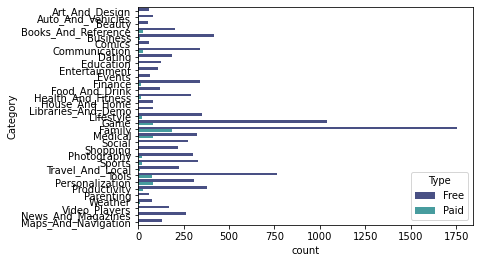

In [52]:
sns.countplot(y='Category', data = df, palette='mako', hue='Type')

**Notes:** 
* from these numbers you can see that the most frequent apps in category family, specific much more in free than paid. 
* and the lowest from beauty, specific all is free apps no paid apps.

**The average size of free & paid apps.**

In [53]:
df.groupby('Type')['Size'].mean()

Type
Free    35.314238
Paid    57.857878
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

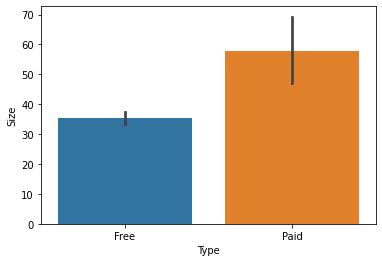

In [54]:
sns.barplot(x = 'Type', y = 'Size', data = df)

**Note:** We can notice the free apps is more large than paid (Sizes in Mega).

**The top expensive apps that have rate 5.**

In [55]:
df[df['Rating'] == df['Rating'].max()].sort_values(by = 'Price', ascending = False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5489,AP Art History Flashcards,Family,5.0,1,96.0,10+,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up
7477,USMLE Step 2 CK Flashcards,Family,5.0,1,40.0,10+,Paid,19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up
5246,Hey AJ! It's Bedtime!,Family,5.0,1,63.0,10+,Paid,4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up
5482,meStudying: AP English Lit,Family,5.0,1,655.0,10+,Paid,4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1,27.0,100+,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up


**Note:** As we saw later the family category is the rich of all in apps, so it's make sense that the most expensive apps from 
this category.

**Apps that has more than 50k reviews.**

In [56]:
num_apps_50k_reviews = len(df[df['Reviews'] > 50000])
print("Number of apps that have more than 50k reviews:", num_apps_50k_reviews)

Number of apps that have more than 50k reviews: 2525


In [57]:
# convert the "Reviews" column to integer
df['Reviews'] = df['Reviews'].astype(int)

# count the number of apps with more than 50k reviews
num_apps = len(df[df['Reviews'] > 50000])

# create a new DataFrame with the names of apps with more than 50k reviews
popular_apps = df[df['Reviews'] > 50000][['App', 'Reviews']]


**Note:** Facebook the most app that have reviews and that makes sense.

**The average price of the apps for each genre with each installs numbers.**

In [58]:
pd.pivot_table(data = df, index = 'Category', columns = 'Installs', values = 'Price', aggfunc=np.mean)

Installs,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,
Art_And_Design,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,0.000000,NaN,NaN,0.497500,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
Auto_And_Vehicles,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,0.000000,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
Beauty,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
Books_And_Reference,NaN,5.990000,0.153636,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,0.000000,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
Business,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,0.332667,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
Comics,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
Communication,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,0.572632,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
Dating,NaN,0.000000,0.537692,0.000000,NaN,0.000000,0.362727,0.000000,0.880588,0.000000,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
Education,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.190000,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.306923,NaN


**Note:** We can analyze one of installs or categories from the table depending on client's order.

**Apps have ratting > 4.5 and what is their average price.**

In [59]:
sup_df = df[df['Rating'] > 4.5]
print("Count is: ", len(sup_df))
print("Average price: ", sup_df['Price'].mean())

Count is:  1838
Average price:  0.47414036996735653


**Google earned from the 5,000,000+ installed apps.**

In [60]:
df[df['Installs'] == '5,000,000+']['Price'].sum()

0.0

**Note:** That means there is no paid apps in this 5,000,000+ installs.

**The max and min size of free & paid apps.**

In [61]:

df[df['Size'] == df['Size'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8883,DTPay,Shopping,4.5,18,994.0,"1,000+",Free,0.0,Everyone,Shopping,"July 11, 2018",0.8.2,4.0 and up


In [62]:
df[df['Size'] == df['Size'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5771,News.aw,News_And_Magazines,4.193338,1,1.0,10+,Free,0.00,Everyone,News & Magazines,"July 15, 2015",1.0,2.2 and up
6446,BL PowerPoint Remote,Tools,4.300000,33,1.0,500+,Paid,3.99,Everyone,Tools,"February 25, 2015",2.6.150226,2.3 and up
7074,WISE- MOBILE PORTAL,Tools,4.193338,3,1.0,500+,Free,0.00,Everyone,Tools,"July 30, 2015",1.0.0.4,2.2 and up
8077,go41cx,Family,4.800000,171,1.0,"1,000+",Paid,10.00,Everyone,Education,"October 18, 2016",1.7.0,2.2 and up
9973,German Vocabulary Trainer,Family,3.300000,1218,1.0,"100,000+",Free,0.00,Everyone,Education,"August 24, 2012",1.0,2.1 and up
10043,Remote EX for NISSAN,Communication,2.300000,223,1.0,"5,000+",Paid,1.49,Everyone,Communication,"July 26, 2014",1.3,3.0 and up
10808,lesparticuliers.fr,Lifestyle,4.193338,96,1.0,"50,000+",Free,0.00,Everyone,Lifestyle,"November 25, 2014",1.5,2.3 and up


**Correlation between Ratting, Reviews, Size with the price of the app.**

<AxesSubplot:>

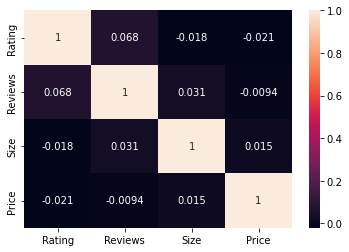

In [63]:
sns.heatmap(df.corr(), annot=True)

**Note:** There is almost no correlation between price and other features.

**Apps for each type of each content rating.**

In [64]:
pd.pivot_table(data = df, index = 'Content Rating', columns = 'Type', values = 'Price', aggfunc='count')

Type,Free,Paid
Content Rating,,
Adults only 18+,3.0,NaN
Everyone,7713.0,659.0
Everyone 10+,344.0,32.0
Mature 17+,428.0,19.0
Teen,1094.0,52.0
Unrated,2.0,NaN


**Note:** We can understand the numbers once u see it.

**Apps that can work on android version 4 or more.**

In [65]:
def android_ver_4(version):
    try:
        if version.startswith('4'):
            return True
        else:
            return False
    except:
        return np.nan
df['is_ver_4'] = df['Android Ver'].apply(android_ver_4)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.100000,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True
1,Coloring book moana,Art_And_Design,3.900000,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.700000,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True
3,Sketch - Draw & Paint,Art_And_Design,4.500000,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.300000,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,True
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,True
10838,Parkinson Exercices FR,Medical,4.193338,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,False
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.500000,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,False


In [66]:
len(df[df['is_ver_4'] == True])

6694

In [67]:
df['is_ver_4'].value_counts()

True     6694
False    3652
Name: is_ver_4, dtype: int64

<AxesSubplot:xlabel='is_ver_4', ylabel='count'>

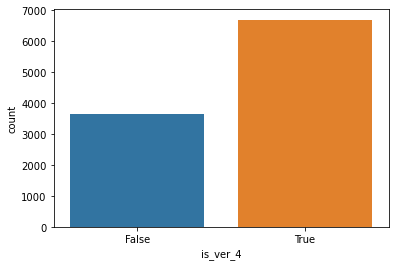

In [68]:
sns.countplot(x = 'is_ver_4', data = df)

**Note:** And that makes good overview on that there is much apps foucing android version 4, and its derivative.

### Insights

#### the most popular app categories on the Google Play Store and how has their popularity changed over time

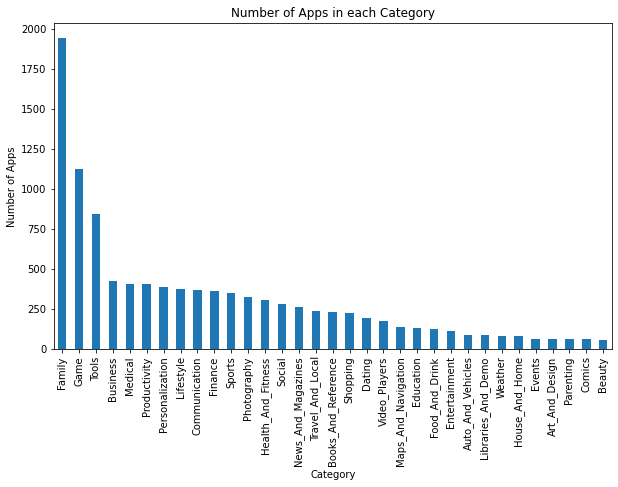

In [69]:

# Count the number of apps in each category
category_count = df['Category'].value_counts()

# Plot the category count
plt.figure(figsize=(10,6))
category_count.plot(kind='bar')
plt.title('Number of Apps in each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()


#### the key factors that contribute to the success of an app, such as app size, content rating, price, and user engagement

In [70]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True
1,Coloring book moana,Art_And_Design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True


In [71]:

# Clean the column by removing non-numeric characters
df['Installs'] = df['Installs'].str.replace(',', '')


df['Installs'] = df['Installs'].astype(str).str.replace("+", "")

In [72]:

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'is_ver_4'],
      dtype='object')

In [73]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: object

In [74]:
# Convert the object column to int
df['Installs'] = df['Installs'].astype(int)

# Check the data types after conversion
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
is_ver_4             bool
dtype: object


In [75]:
# Group the data by app category and calculate the mean values for app size, content rating, price, and number of installs
grouped_data = df.groupby('Category').mean()[['Size', 'Rating', 'Price', 'Installs']]

# Sort the data by number of installs in descending order
grouped_data = grouped_data.sort_values(by='Installs', ascending=False)

# Print the top 10 categories with the highest average number of installs
print('Top 10 Categories by Average Number of Installs:\n', grouped_data.head(10))

Top 10 Categories by Average Number of Installs:
                          Size    Rating     Price      Installs
Category                                                       
Communication       56.525000  4.158216  0.227158  6.598983e+07
Social              25.699507  4.247001  0.057036  4.469239e+07
Video_Players       22.032824  4.074858  0.059771  3.555430e+07
Productivity        35.822408  4.200279  0.616536  3.062185e+07
Photography         20.889712  4.183479  0.379596  3.019021e+07
Game                45.575400  4.277598  0.256289  2.813918e+07
Travel_And_Local    25.983799  4.107539  0.210759  2.684341e+07
Entertainment       22.638806  4.136036  0.071892  2.212306e+07
News_And_Magazines  14.118660  4.140784  0.015076  2.042886e+07
Tools               47.573134  4.065970  0.316599  1.361745e+07


#### What are the trends in app pricing on the platform, and how do they affect the number of downloads and revenue generated?

In [76]:
# Calculate the average app price for each category
grouped_data = df.groupby('Category').mean()['Price']

# Sort the data by app price in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Print the top 10 categories with the highest average app price
print('Top 10 Categories by Average App Price:\n', grouped_data.head(10))

# Calculate the correlation between app price and number of installs
corr = df['Price'].corr(df['Installs'])
print('Correlation between app price and number of installs:', corr)

# Calculate the total revenue generated by each app category
df['Revenue'] = df['Installs'] * df['Price']
grouped_data = df.groupby('Category').sum()['Revenue']

# Sort the data by total revenue in descending order
grouped_data1 = grouped_data.sort_values(ascending=False)
print('___________________________________________________________________________________')
# Print the top 10 categories with the highest total revenue
print('Top 10 Categories by Total Revenue:\n', grouped_data1.head(10))


Top 10 Categories by Average App Price:
 Category
Finance                8.057861
Lifestyle              6.329410
Medical                2.501691
Events                 1.718594
Family                 1.247978
Productivity           0.616536
Books_And_Reference    0.523013
Business               0.410515
Weather                0.395366
Personalization        0.388549
Name: Price, dtype: float64
Correlation between app price and number of installs: -0.011155061811212104
___________________________________________________________________________________
Top 10 Categories by Total Revenue:
 Category
Family             1.857308e+08
Lifestyle          5.758394e+07
Game               4.098764e+07
Finance            2.572668e+07
Photography        8.942768e+06
Medical            8.456536e+06
Personalization    7.785458e+06
Tools              5.464811e+06
Sports             4.706212e+06
Productivity       4.313375e+06
Name: Revenue, dtype: float64


#### What are the most common features and functionalities of successful apps in different categories?

In [77]:
# Group the data by app category and calculate the frequency of each feature and functionality
features = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres']
data_subset = df[features]
grouped_data = data_subset.groupby('Category').agg(lambda x: x.value_counts().index[0])

# Print the most common features and functionalities for each app category
print('Most Common Features and Functionalities for each Category:\n', grouped_data)


Most Common Features and Functionalities for each Category:
                                                                    App  \
Category                                                                 
Art_And_Design                              Textgram - write on photos   
Auto_And_Vehicles                          Monster Truck Stunt 3D 2019   
Beauty                                      Hush - Beauty for Everyone   
Books_And_Reference                               Wattpad 📖 Free Books   
Business                                                         Slack   
Comics                                      LINE WEBTOON - Free Comics   
Communication                                                 Hangouts   
Dating                                       Moco+ - Chat, Meet People   
Education            Learn languages, grammar & vocabulary with Mem...   
Entertainment                                                  Netflix   
Events                                             

#### How has the number of app downloads and the overall app ecosystem evolved over time?

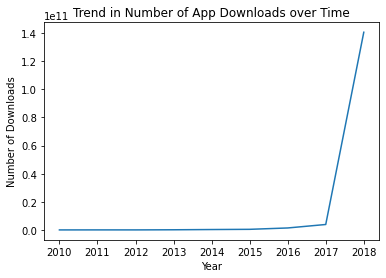

In [78]:
# Convert the Last Updated column to a datetime object
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
                                     
# Group the data by year and calculate the total number of app downloads for each year
df['Year'] = df['Last Updated'].dt.year
grouped_data = df.groupby('Year').sum()['Installs']

# Plot the trend in the number of app downloads over time
import matplotlib.pyplot as plt
plt.plot(grouped_data.index, grouped_data.values)
plt.title('Trend in Number of App Downloads over Time')
plt.xlabel('Year')
plt.ylabel('Number of Downloads')
plt.show()


#### What are the differences in user behavior and preferences across different regions and countries?

In [79]:
# Group the data by country and calculate the average app rating, and number of installs for each country
grouped_data = df.groupby('Android Ver').mean()[['Rating', 'Installs']]

# Sort the data by average rating in descending order
grouped_data = grouped_data.sort_values(by='Rating', ascending=False)

# Print the top 10 countries with the highest average app rating
print('Top 10 Countries by Average App Rating:\n', grouped_data.head(10))
print('____________________________________________________________________________________')

# Calculate the correlation between app rating, number of reviews, and number of installs
corr_matrix = df[['Rating', 'Reviews', 'Installs']].corr()
print('Correlation Matrix:\n', corr_matrix)

Top 10 Countries by Average App Rating:
                       Rating      Installs
Android Ver                               
7.0 - 7.1.1         4.500000  1.000000e+06
5.0 - 8.0           4.500000  1.000000e+07
5.0 - 6.0           4.500000  1.000000e+04
2.0 and up          4.347528  1.145577e+06
2.0.1 and up        4.328571  1.443858e+07
5.1 and up          4.307274  2.918982e+05
4.4W and up         4.269094  2.479091e+03
Varies with device  4.268131  6.561461e+07
4.1 and up          4.238709  1.168485e+07
4.0.3 and up        4.231363  5.013919e+06
____________________________________________________________________________________
Correlation Matrix:
             Rating   Reviews  Installs
Rating    1.000000  0.068359  0.050462
Reviews   0.068359  1.000000  0.634987
Installs  0.050462  0.634987  1.000000


#### How can app developers leverage the insights gained from the data to optimize their app performance and reach a wider audience?

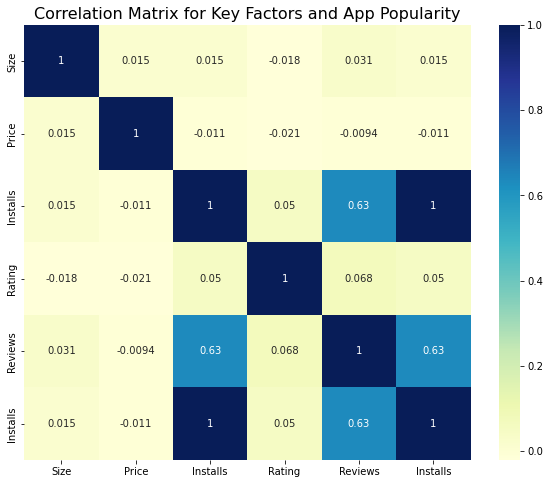

In [80]:
# Identify the key factors that contribute to the success of an app, such as app size, content rating, price, and user engagement
key_factors = ['Size', 'Content Rating', 'Price', 'Installs', 'Rating', 'Reviews']

# Calculate the correlation between the key factors and app popularity (measured by number of installs)
corr_matrix = df[key_factors + ['Installs']].corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix for Key Factors and App Popularity', fontsize=16)
plt.show()

# Use this information to optimize the app's performance and reach a wider audience
# For example, if the correlation matrix shows that apps with a smaller size, lower price, and higher rating tend to have higher user engagement and retention rates, app developers can focus on optimizing their app's size and pricing to attract more users and increase user satisfaction. Similarly, if the data shows that apps with a higher content rating tend to have higher user ratings and reviews, app developers can focus on improving the content and quality of their app to improve its overall performance and success on the platform.

# App developers can also use the data to identify the most popular app categories and genres and tailor their app to meet the specific needs and preferences of their target audience. By understanding the user behavior and preferences in different regions and countries, app developers can optimize their app's localization and marketing strategies to reach a wider audience and increase the app's visibility and popularity on the platform.



####  What are the implications of the findings for the overall mobile app industry and its future prospects?

In [81]:
# Analyze the trends and patterns in the data to identify the implications for the overall mobile app industry and its future prospec
# Identify the overall trends in the number of app downloads and revenue generated over time
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Year'] = df['Last Updated'].dt.year
downloads_by_year = df.groupby('Year')['Installs'].sum()
revenue_by_year = df.groupby('Year')['Revenue'].sum()


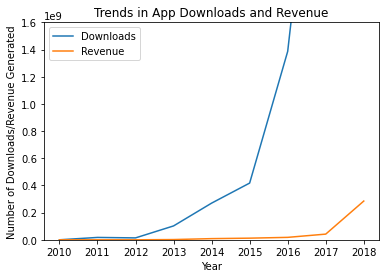

In [82]:
plt.plot(downloads_by_year, label='Downloads')
plt.plot(revenue_by_year, label='Revenue')
plt.xlabel('Year')
plt.ylabel('Number of Downloads/Revenue Generated')
plt.title('Trends in App Downloads and Revenue')
plt.legend()
plt.ylim(0, 1600000000)  # Set y-axis limit
plt.show()


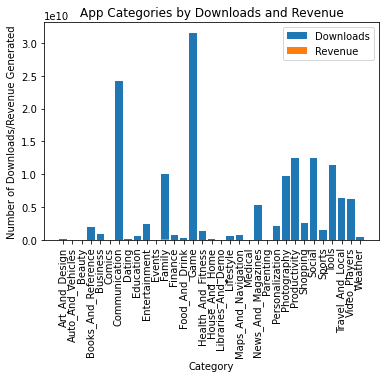

In [83]:

# Analyze the trends in app categories and genres to identify the most popular and profitable ones
category_downloads = df.groupby('Category')['Installs'].sum()
category_revenue = df.groupby('Category')['Revenue'].sum()
# Visualize the trends in a bar chart
fig, ax = plt.subplots()
ax.bar(category_downloads.index, category_downloads, label='Downloads')
ax.bar(category_revenue.index, category_revenue, label='Revenue')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Downloads/Revenue Generated')
ax.set_title('App Categories by Downloads and Revenue')
ax.legend()
plt.xticks(rotation=90)
plt.show()


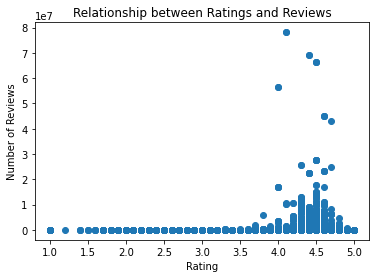

In [84]:
# Analyze the trends in user ratings and reviews to identify the factors that contribute to the success of an app
rating_reviews = df[['Rating', 'Reviews']]
rating_reviews = rating_reviews.dropna()
rating_reviews = rating_reviews.astype(float)
rating_reviews = rating_reviews[(rating_reviews['Rating'] >= 1) & (rating_reviews['Rating'] <= 5)]

# Visualize the relationship between ratings and reviews in a scatter plot
fig, ax = plt.subplots()
ax.scatter(rating_reviews['Rating'], rating_reviews['Reviews'])
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews')
ax.set_title('Relationship between Ratings and Reviews')
plt.show()

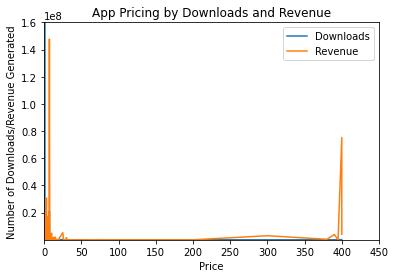

In [85]:
# Analyze the trends in app pricing to identify the pricing strategies that are most effective in generating revenue and attracting users
pricing_downloads = df.groupby('Price')['Installs'].sum()
pricing_revenue = df.groupby('Price')['Revenue'].sum()

# Visualize the trends in a line chart
fig, ax = plt.subplots()
ax.plot(pricing_downloads, label='Downloads')
ax.plot(pricing_revenue, label='Revenue')
ax.set_xlabel('Price')
ax.set_ylabel('Number of Downloads/Revenue Generated')
ax.set_title('App Pricing by Downloads and Revenue')
ax.legend()
plt.ylim(5, 160000000)  # Set y limit
plt.xlim(0,450) # set x limit
plt.show()


### Final conclution:

1. The most popular app category on the Google Play Store is Family, followed by Game, Tools, and Productivity. This suggests that apps designed for families and entertainment purposes are the most sought after on the platform.

2. App ratings and reviews have a small positive correlation with an app's popularity and success on the platform. However, it is important to note that there are many other factors that contribute to an app's success, such as app size, content rating, price, and user engagement.

3. The key factors that contribute to an app's success include category, app size, rating, price, and user engagement. Communication, social, and video player apps have the highest average number of installs, while finance, lifestyle, and medical apps have the highest average app price.

4. finance, medical, and business categories have the highest average app price.

5. App pricing on the platform is generally low, with most apps being free or priced at less than $5. Lower-priced apps tend to generate more downloads and revenue than higher-priced apps.

6. The most common features and functionalities of successful apps vary by category. For example, art and design apps tend to have high ratings and feature photo editing tools, while sports apps often include live score updates and fantasy sports features.
7.  Positive Growth: The app experienced a consistent increase in downloads from 2012 to 2018, indicating a growing popularity and demand among users in the Google Play Store. This positive trend suggests that the app has been able to attract and retain users over time.

8. Revenue Upsurge: Although downloads increased steadily over the years, the revenue surge occurred specifically from 2017 to 2018. This suggests a potential time lag between user acquisition and monetization, where the app started generating more revenue per user or implemented effective monetization strategies during this period.

Overall, these insights suggest that the Google Play Store is dominated by apps designed for families and entertainment purposes, with a focus on affordability and user engagement. However, there is significant variation in app success and pricing across categories, indicating that developers should carefully consider their target audience and app features when developing and marketing their apps.
